In [1]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Working with time Series
We first download the data with our api key.

In [9]:
ts = TimeSeries(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
# We can describe it
data.describe()

,open,high,low,close,volume
count,3772.000000,3772.000000,3772.000000,3772.000000,3.772000e+03
mean,85.672008,85.694753,85.648424,85.671520,5.104851e+04
std,0.561741,0.562496,0.560942,0.561721,3.152561e+05
min,84.540000,84.590000,84.530000,84.545000,1.266000e+03
25%,85.310000,85.330000,85.294475,85.313300,1.772200e+04
50%,85.540000,85.570000,85.520000,85.540000,2.801400e+04
75%,85.900000,85.925875,85.880000,85.900000,4.615150e+04
max,87.380000,87.499900,87.165000,87.380000,1.297732e+07


Check the meta data given back by the api call.

In [10]:
meta_data

{'1. Information': 'Intraday (1min) prices and volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2017-12-26 13:42:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

## Getting csv data

In [11]:
ts = TimeSeries(key=os.environ['API_KEY'], output_format='csv')
data_csv,_ = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
data_csv

## Plotting time series

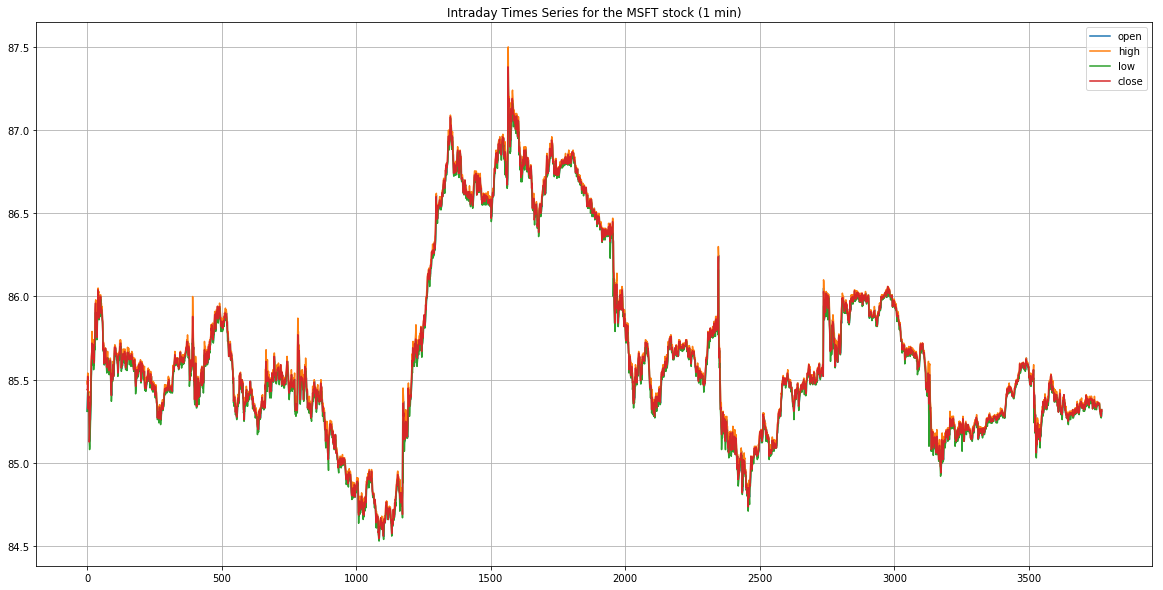

In [12]:
data = data.drop('volume',1)
data.plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

# Working with technical indicators

In [13]:
ti = TechIndicators(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.describe()

,Real Middle Band,Real Upper Band,Real Lower Band
count,8.000000,8.000000,8.000000
mean,85.692262,86.859450,84.525100
std,0.007091,0.003375,0.011120
min,85.682000,86.856100,84.507900
25%,85.688900,86.857925,84.519725
50%,85.692200,86.858450,84.526050
75%,85.695200,86.860050,84.530425
max,85.705100,86.867100,84.543200


In [14]:
meta_data

{'1: Symbol': 'MSFT',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2017-12-26 13:00:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

## Plotting technical indicators

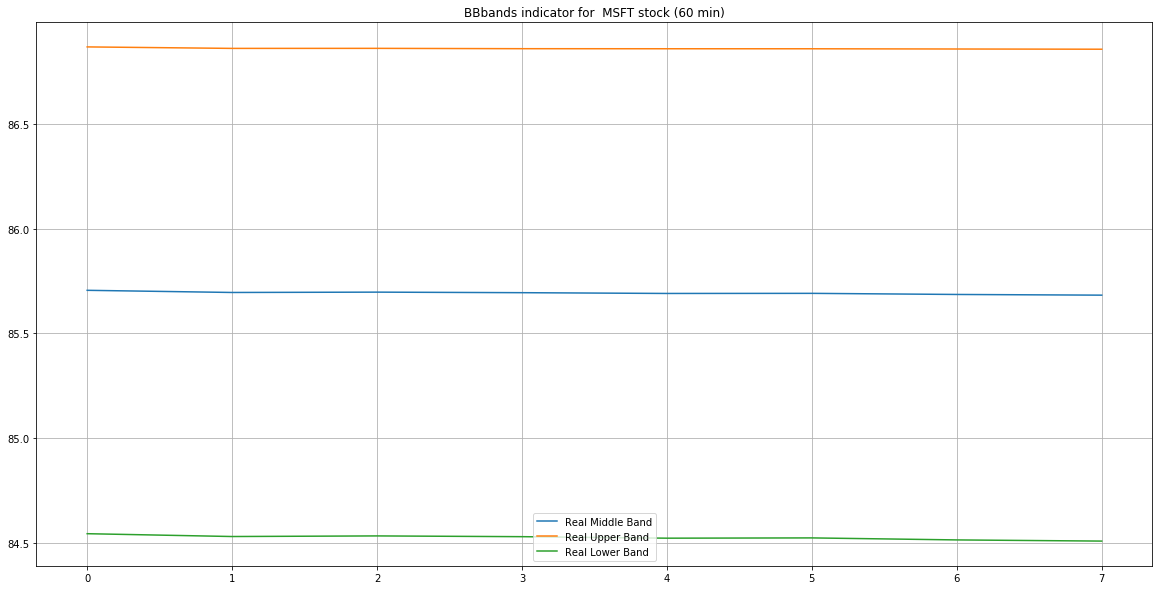

In [15]:
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.grid()
plt.show()

# Working with Sector Performance

In [16]:
sp = SectorPerformances(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000
mean,0.000991,0.000982,0.002373,0.036391,0.056436,0.141364,0.131627,0.239300,0.745630,0.738290
std,0.004442,0.003002,0.024038,0.053683,0.042860,0.127749,0.119278,0.198843,0.455969,0.727965
min,-0.007200,-0.003200,-0.047000,-0.053400,-0.020600,-0.055700,-0.050300,-0.108100,-0.010500,-0.113700
25%,-0.000550,-0.001250,-0.006050,0.008200,0.031450,0.069150,0.075750,0.131275,0.516250,0.189675
50%,0.001500,0.001500,0.008000,0.039200,0.058600,0.183300,0.166200,0.204200,0.775150,0.609450
75%,0.003250,0.002050,0.012550,0.064050,0.089850,0.209700,0.190700,0.376725,1.093475,1.206300
max,0.007700,0.007400,0.045400,0.144100,0.109500,0.383500,0.360200,0.603700,1.406500,1.995800


In [17]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '01:33 PM ET 12/26/2017'}

## Plotting Sector Performance

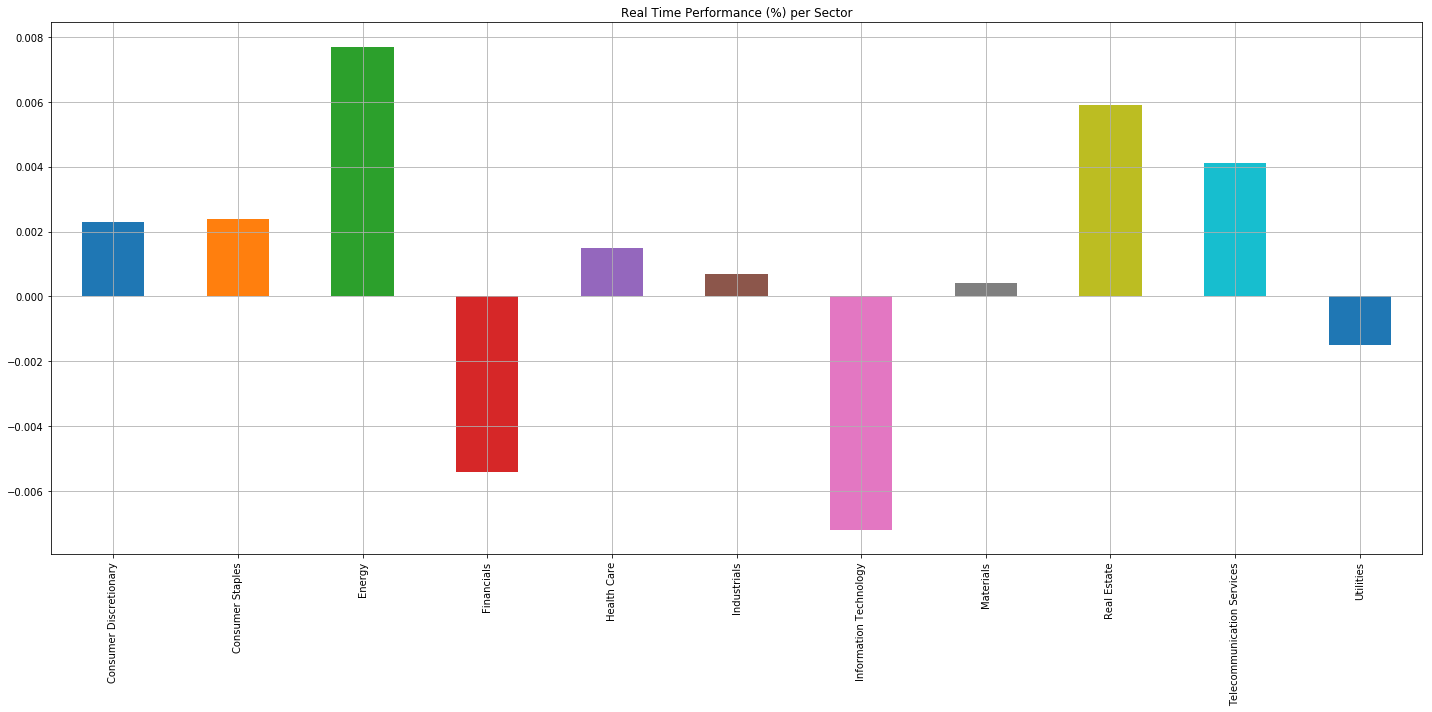

In [18]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

# Working with Crypto Currencies

To just get the current exchange rate

In [19]:
cc = CryptoCurrencies(key=os.environ['API_KEY'])

To get the intraday price of bitcoin 

In [20]:
# I changed the internal format of the the class to be our friendly data frame.
cc.output_format='pandas'
data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data.describe()

,. price (CNY),. price (USD),volume,market cap (USD)
count,922.000000,922.000000,922.000000,922.000000
mean,93390.876305,14221.374818,2.446022,34624.683764
std,6299.596013,966.886142,2.189504,31462.005132
min,86559.381555,13148.880318,0.110060,1536.873026
25%,86751.134139,13195.256720,0.170380,2465.784581
50%,91010.069940,13850.740231,2.716676,35942.568312
75%,100699.172000,15315.114028,4.589912,60609.259549
max,103476.713379,15811.806235,5.094380,79539.768114


In [21]:
data.head(5)

,date,. price (CNY),. price (USD),volume,market cap (USD)
0,2017-12-23 13:55:00,95331.44522,14498.638098,0.17279,2505.219677
1,2017-12-23 14:00:00,95331.44522,14498.638098,0.17279,2505.219677
2,2017-12-23 14:05:00,95331.44522,14498.638098,0.17279,2505.219677
3,2017-12-23 14:10:00,95331.44522,14498.638098,0.17279,2505.219677
4,2017-12-23 14:15:00,95331.44522,14498.638098,0.17279,2505.219677


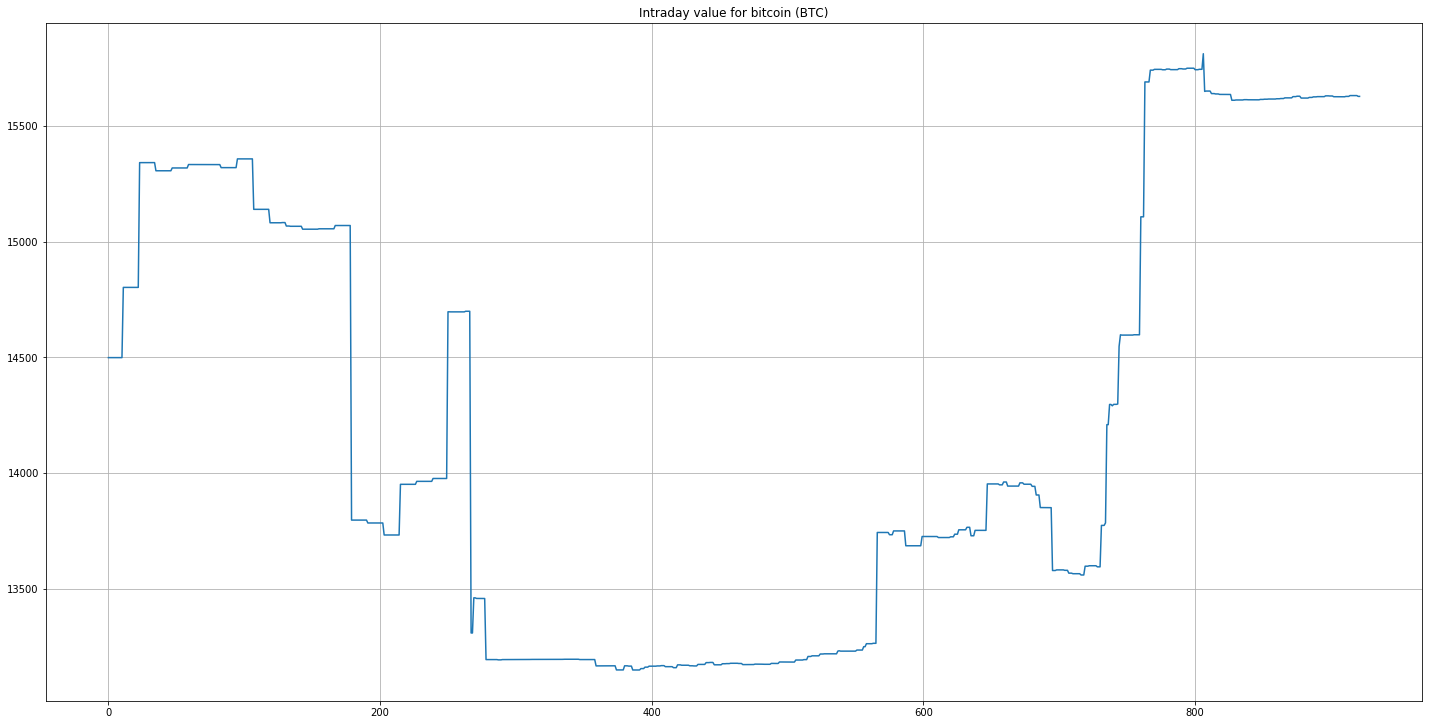

In [22]:
data['. price (USD)'].plot()
plt.tight_layout()
plt.title('Intraday value for bitcoin (BTC)')
plt.grid()
plt.show()